In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
## multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = "customer_conversion_testing_dataset.csv"
df = pd.read_csv(data)
print(df.dtypes)

LeadID                     int64
Age                        int64
Gender                    object
Location                  object
LeadSource                object
TimeSpent (minutes)        int64
PagesViewed                int64
LeadStatus                object
EmailSent                  int64
DeviceType                object
ReferralSource            object
FormSubmissions            int64
Downloads                  int64
CTR_ProductPage          float64
ResponseTime (hours)       int64
FollowUpEmails             int64
SocialMediaEngagement      int64
PaymentHistory            object
Conversion (Target)        int64
dtype: object


In [3]:
df

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Lahore,Organic,46,6,Hot,10,Mobile,Facebook,2,3,0.8,11,3,54,Good,0
1,2,27,Male,Lahore,Email,42,8,Warm,6,Tablet,Direct,1,1,0.4,23,2,35,No Payment,0
2,3,21,Male,Sialkot,Email,56,11,Cold,1,Tablet,Direct,5,3,0.5,8,0,34,Good,0
3,4,37,Female,Quetta,Organic,24,15,Cold,6,Tablet,Direct,1,1,0.7,10,3,59,Good,0
4,5,35,Female,Quetta,Email,39,14,Hot,10,Desktop,Direct,1,3,0.5,13,5,35,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26140,26141,57,Female,Sialkot,Referral,15,3,Hot,6,Mobile,Direct,3,0,0.8,24,2,55,No Payment,0
26141,26142,34,Male,Islamabad,Email,30,11,Cold,7,Desktop,Twitter,5,2,0.8,21,6,43,Good,0
26142,26143,44,Female,Gujranwala,Social Media,10,15,Warm,10,Mobile,Google,1,1,0.2,8,6,117,Good,0
26143,26144,20,Male,Rawalpindi,Social Media,60,10,Hot,3,Desktop,Facebook,3,2,0.3,14,5,50,No Payment,0


In [4]:
def null_check(data_frame):
    print(f'Total null values per row: \n{data_frame.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{data_frame.isnull().sum()}\n')

null_check(df)

Total null values per row: 
0        0
1        0
2        0
3        0
4        0
        ..
26140    0
26141    0
26142    0
26143    0
26144    0
Length: 26145, dtype: int64

Total null values per column: 
LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpent (minutes)      0
PagesViewed              0
LeadStatus               0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTime (hours)     0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion (Target)      0
dtype: int64



In [5]:
def dup_check(data_frame):
    print(f'Duplicates found: {data_frame.duplicated().any()}\n')
    print(f'Number of duplicates: {data_frame.duplicated().sum()}\n')
    
dup_check(df)

Duplicates found: False

Number of duplicates: 0



In [6]:
df.rename(columns={"TimeSpent (minutes)":"TimeSpent"}, inplace=True)

In [7]:
df.rename(columns={"Conversion (Target)":"Conversion"}, inplace=True)

In [8]:
df['ResponseTime'] = df['ResponseTime (hours)'] * 60

# Drop the original 'ResponseTime (hours)' column
df.drop(columns=['ResponseTime (hours)'], inplace=True)

In [9]:
df = df.drop(columns={'Location','LeadStatus'}, axis=1)

In [10]:
df.head(3)

,LeadID,Age,Gender,LeadSource,TimeSpent,PagesViewed,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion,ResponseTime
0,1,60,Female,Organic,46,6,10,Mobile,Facebook,2,3,0.8,3,54,Good,0,660
1,2,27,Male,Email,42,8,6,Tablet,Direct,1,1,0.4,2,35,No Payment,0,1380
2,3,21,Male,Email,56,11,1,Tablet,Direct,5,3,0.5,0,34,Good,0,480


In [11]:
df_without_target = df.drop('Conversion', axis=1)

In [12]:
#checking outliers

for column in df_without_target.columns:
    if pd.api.types.is_numeric_dtype(df_without_target[column]):
        # Calculate IQR and base_min, base_max
        IQR = df_without_target[column].quantile(0.75) - df_without_target[column].quantile(0.25)
        base_min = df_without_target[column].quantile(0.25) - 1.5 * IQR
        base_max = df_without_target[column].quantile(0.75) + 3 * IQR

        # Count outliers
        x_low = sum(df_without_target[column] < base_min)
        x_high = sum(df_without_target[column] > base_max)

        # Print results
        print(f'Column: {column}')
        print(f'Outliers too low: {x_low}')
        print(f'Outliers too high: {x_high}')
        print('---')

Column: LeadID
Outliers too low: 0
Outliers too high: 0
---
Column: Age
Outliers too low: 0
Outliers too high: 0
---
Column: TimeSpent
Outliers too low: 0
Outliers too high: 0
---
Column: PagesViewed
Outliers too low: 0
Outliers too high: 0
---
Column: EmailSent
Outliers too low: 0
Outliers too high: 0
---
Column: FormSubmissions
Outliers too low: 0
Outliers too high: 0
---
Column: Downloads
Outliers too low: 0
Outliers too high: 0
---
Column: CTR_ProductPage
Outliers too low: 0
Outliers too high: 0
---
Column: FollowUpEmails
Outliers too low: 0
Outliers too high: 0
---
Column: SocialMediaEngagement
Outliers too low: 0
Outliers too high: 0
---
Column: ResponseTime
Outliers too low: 0
Outliers too high: 0
---


In [13]:
categoricals = df.select_dtypes(include=[object, bool])
categoricals.head(3)

,Gender,LeadSource,DeviceType,ReferralSource,PaymentHistory
0,Female,Organic,Mobile,Facebook,Good
1,Male,Email,Tablet,Direct,No Payment
2,Male,Email,Tablet,Direct,Good


In [14]:
numericals = df.select_dtypes(include = 'number')
numericals.head(3)

,LeadID,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,Conversion,ResponseTime
0,1,60,46,6,10,2,3,0.8,3,54,0,660
1,2,27,42,8,6,1,1,0.4,2,35,0,1380
2,3,21,56,11,1,5,3,0.5,0,34,0,480


In [15]:
ordinals = categoricals[['PaymentHistory']]
ordinals.head(3)

,PaymentHistory
0,Good
1,No Payment
2,Good


In [16]:
ordinals = categoricals['PaymentHistory'].map({'Good':1, 'No Payment':0})

In [17]:
nominals = categoricals.drop(columns=['PaymentHistory'])

In [18]:
nominals.head(3)

,Gender,LeadSource,DeviceType,ReferralSource
0,Female,Organic,Mobile,Facebook
1,Male,Email,Tablet,Direct
2,Male,Email,Tablet,Direct


In [19]:
#making dummies from nominals
nominals = pd.get_dummies(nominals, dtype=int)
nominals.head()

,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter
0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,1,1,0,0,0,0
2,0,1,1,0,0,0,0,0,1,1,0,0,0,0
3,1,0,0,1,0,0,0,0,1,1,0,0,0,0
4,1,0,1,0,0,0,1,0,0,1,0,0,0,0


In [20]:
categoricals = pd.concat([ordinals, nominals], axis=1)
categoricals.head()

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter
0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
2,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0
4,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0


In [21]:
df = pd.concat([categoricals, numericals], axis=1)
df.head()

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,LeadID,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,Conversion,ResponseTime
0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,60,46,6,10,2,3,0.8,3,54,0,660
1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,2,27,42,8,6,1,1,0.4,2,35,0,1380
2,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,3,21,56,11,1,5,3,0.5,0,34,0,480
3,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,4,37,24,15,6,1,1,0.7,3,59,0,600
4,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,5,35,39,14,10,1,3,0.5,5,35,0,780


In [22]:
df.columns

Index(['PaymentHistory', 'Gender_Female', 'Gender_Male', 'LeadSource_Email',
       'LeadSource_Organic', 'LeadSource_Referral', 'LeadSource_Social Media',
       'DeviceType_Desktop', 'DeviceType_Mobile', 'DeviceType_Tablet',
       'ReferralSource_Direct', 'ReferralSource_Facebook',
       'ReferralSource_Google', 'ReferralSource_ReferralSite',
       'ReferralSource_Twitter', 'LeadID', 'Age', 'TimeSpent', 'PagesViewed',
       'EmailSent', 'FormSubmissions', 'Downloads', 'CTR_ProductPage',
       'FollowUpEmails', 'SocialMediaEngagement', 'Conversion',
       'ResponseTime'],
      dtype='object')

In [23]:
df.head(3)

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,LeadID,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,Conversion,ResponseTime
0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,60,46,6,10,2,3,0.8,3,54,0,660
1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,2,27,42,8,6,1,1,0.4,2,35,0,1380
2,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,3,21,56,11,1,5,3,0.5,0,34,0,480


In [24]:
y = df[['Conversion']]
X = df.drop(['Conversion', 'LeadID'], axis=1)

In [25]:
X.head(3)

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime
0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,60,46,6,10,2,3,0.8,3,54,660
1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,27,42,8,6,1,1,0.4,2,35,1380
2,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,21,56,11,1,5,3,0.5,0,34,480


In [26]:
y.head()

,Conversion
0,0
1,0
2,0
3,0
4,0


In [27]:
y.shape

(26145, 1)

In [28]:
#train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

array([[<Axes: title={'center': 'Conversion'}>]], dtype=object)

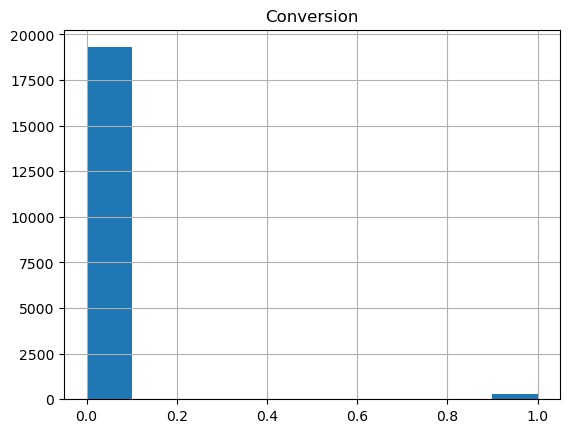

In [29]:
y_train.hist()

## Downsampling

In [30]:
df_train=pd.concat([X_train, y_train], axis=1)
df_train.head(3)

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime,Conversion
9162,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,48,44,8,1,2,0,0.3,5,75,780,0
23315,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,38,51,8,4,3,0,0.3,2,92,840,0
16183,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,39,27,12,3,1,2,0.6,2,91,480,0


In [31]:
#downsampling
category_0 = df_train[df_train['Conversion'] == 0] # negative class (majority)
category_1 = df_train[df_train['Conversion'] == 1] # positive class (minority)

print(category_0['Conversion'].value_counts())
print(category_1['Conversion'].value_counts())

Conversion
0    19295
Name: count, dtype: int64
Conversion
1    313
Name: count, dtype: int64


In [32]:
c1_len=1000
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(1000, 26)
(313, 26)


In [33]:
# reassemble the data
df_train = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
df_train = df_train.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
df_train['Conversion'].value_counts()

Conversion
0    1000
1     313
Name: count, dtype: int64

In [34]:
df_train.head(3)

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime,Conversion
13958,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,57,24,15,2,0,3,0.3,5,86,1020,0
14812,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,46,21,13,6,4,0,0.3,6,46,1140,1
26124,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,23,34,11,5,0,1,0.1,0,93,1440,0


In [35]:
X_train=df_train.drop(columns=["Conversion"])
y_train=df_train[["Conversion"]]

### Upsampling using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [37]:
y.value_counts()

Conversion
0             25732
1               413
Name: count, dtype: int64

In [38]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

Conversion
0             1000
1             1000
Name: count, dtype: int64

In [39]:
X_sm.head(3)

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime
0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,57,24,15,2,0,3,0.3,5,86,1020
1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,46,21,13,6,4,0,0.3,6,46,1140
2,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,23,34,11,5,0,1,0.1,0,93,1440


In [40]:
X_train.head(3)

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,ReferralSource_Direct,ReferralSource_Facebook,ReferralSource_Google,ReferralSource_ReferralSite,ReferralSource_Twitter,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime
13958,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,57,24,15,2,0,3,0.3,5,86,1020
14812,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,46,21,13,6,4,0,0.3,6,46,1140
26124,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,23,34,11,5,0,1,0.1,0,93,1440


In [41]:
from sklearn.preprocessing import PowerTransformer

In [42]:
#fitting power transformer to use in train and test sets

pt=PowerTransformer()

In [43]:
#transforming train and test sets

pt.fit(X_train)
X_train=pt.transform(X_sm)
X_test=pt.transform(X_test)

PowerTransformer()

In [44]:
y_sm = y_sm.astype(int)


### Fit a Knn Classifier model on the training data.

In [45]:
%matplotlib inline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model

model.fit(X_train, y_train) # train model

y_pred = model.predict(X_test.values) # predict test

y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a custom weight function
def custom_weight_function(distances):
    # Example: Give more weight to class 1 (assuming binary classification)
    weights = np.where(distances == 0, 5, 0.5)  # Assign more weight to class 1
    return weights

# Instantiate KNN Classifier model
model = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': list(range(2, 21)),  # Range from 2 to 20
    'weights': [custom_weight_function, 'uniform', 'distance']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')

# Fit the model
grid_search.fit(X_train, y_sm)  # Assuming X_train and y_sm are your training data

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Now, best_model is the KNeighborsClassifier with the best hyperparameters
# You can use it for predictions on the test set
y_pred = best_model.predict(X_test)  # Assuming X_test is your test data


# Fit the model
model.fit(X_train, y_sm)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'weights': [<function custom_weight_function at 0x1713b4fe0>,
                                     'uniform', 'distance']},
             scoring='recall')

Best parameters: {'n_neighbors': 19, 'weights': <function custom_weight_function at 0x1713b4fe0>}


KNeighborsClassifier()

In [47]:


# Instantiate KNN Classifier model
model = KNeighborsClassifier(n_neighbors=19,weights=custom_weight_function)

# Fit the model
model.fit(X_train, y_sm)


KNeighborsClassifier(n_neighbors=19,
                     weights=<function custom_weight_function at 0x1713b4fe0>)

In [48]:
# Predictions on the test set


y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)

# Evaluate performance
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm, y_pred_train),
                                         precision_score(y_sm, y_pred_train),
                                         recall_score(y_sm, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.97550,0.744837
1,Precision,0.96031,0.043655
2,Recall,0.99200,0.750000


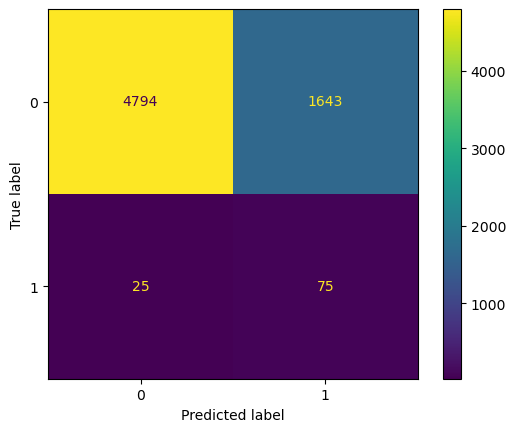

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## RandomForest Model

In [50]:
RAND_STATE = 42 # for reproducible shuffling
TT_RATIO = 0.25 # test/train

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":6,
           "min_samples_leaf":20,
           "n_estimators":100,
           "bootstrap":True,
           "oob_score":True,
           "random_state":RAND_STATE}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_sm)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_sm)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

RandomForestClassifier(max_depth=6, min_samples_leaf=20, oob_score=True,
                       random_state=42)

train prediction accuracy score: 0.93
test prediction accuracy score: 0.84


In [52]:
clf.oob_score_

0.9185

In [53]:
from sklearn.metrics import accuracy_score
score_ds = accuracy_score(y_test,clf.predict(X_test))

In [54]:
score_ds

0.8415175156799756

## tune the hyper paramters with gridsearch and check the results

In [55]:
# Create the GridSearchCV object
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': list(range(2, 12)),  # Range from 2 to 50 (inclusive)
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)

# Fit the model
grid_search.fit(X_train,y_sm)  # Assuming X_train and y_sm are your training data

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Now, best_model is the KNeighborsClassifier with the best hyperparameters
# You can use it for predictions on the test set
y_pred = best_model.predict(X_test)  # Assuming X_test is your test data


# Fit the model
clf.fit(X_train, y_sm)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=6, min_samples_leaf=20,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

Best parameters: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(max_depth=6, min_samples_leaf=20, oob_score=True,
                       random_state=42)

## fit a Random forest Classifier with max_depth optimal 

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":11,
           "min_samples_leaf":1,
           'min_samples_split': 2,
           "n_estimators":100,
           "oob_score":True,
           "random_state":42}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_sm)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_sm)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

RandomForestClassifier(max_depth=11, oob_score=True, random_state=42)

train prediction accuracy score: 1.00
test prediction accuracy score: 0.90


In [57]:
# Predictions on the test set


y_pred = clf.predict(X_test) # predict test
y_pred_train=clf.predict(X_train) # predict train (for sanity checks)

# Evaluate performance
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm, y_pred_train),
                                         precision_score(y_sm, y_pred_train),
                                         recall_score(y_sm, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.996500,0.896895
1,Precision,0.993049,0.114247
2,Recall,1.000000,0.850000


### Visualizing 

RandomForestClassifier(max_depth=1, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=2, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=3, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=4, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=6, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=7, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=8, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=9, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=10, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=11, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=12, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=13, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=14, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=15, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=17, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=18, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=19, oob_score=True, random_state=42)

RandomForestClassifier(max_depth=20, oob_score=True, random_state=42)

<Figure size 1500x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Random Forest Classifier Performance vs. Max Depth (Accuracy)')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Accuracy')

<Axes: >

Text(0.5, 1.0, 'Random Forest Classifier Performance vs. Max Depth (Recall)')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Recall')

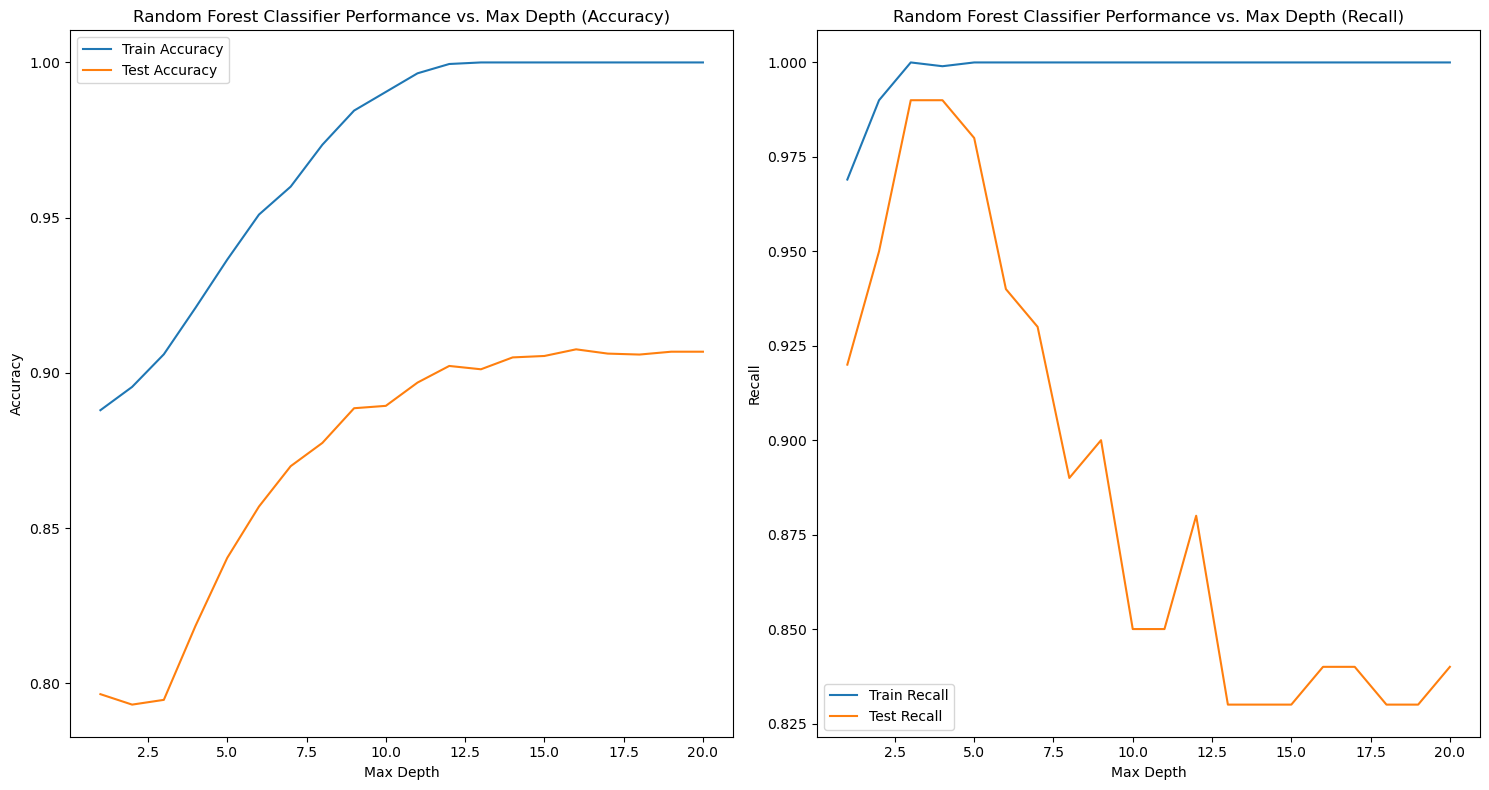

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_sm, X_test, y_test are already defined

# Define a range of values for max_depth
max_depth_values = list(range(1, 21))  # Adjust the range as needed

# Initialize empty lists to store accuracy and recall scores
train_accuracy_scores = []
test_accuracy_scores = []
train_recall_scores = []
test_recall_scores = []

# Iterate over different values of max_depth
for max_depth in max_depth_values:
    rfc_ops["max_depth"] = max_depth
    clf = RandomForestClassifier(**rfc_ops)
    clf.fit(X_train, y_sm)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_sm, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    # Calculate recall scores
    train_recall = recall_score(y_sm, clf.predict(X_train))
    test_recall = recall_score(y_test, clf.predict(X_test))
    
    # Append scores to lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)

# Plot the results
plt.figure(figsize=(15, 8))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(max_depth_values, train_accuracy_scores, label='Train Accuracy')
plt.plot(max_depth_values, test_accuracy_scores, label='Test Accuracy')
plt.title('Random Forest Classifier Performance vs. Max Depth (Accuracy)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

# Plot Recall
plt.subplot(1, 2, 2)
plt.plot(max_depth_values, train_recall_scores, label='Train Recall')
plt.plot(max_depth_values, test_recall_scores, label='Test Recall')
plt.title('Random Forest Classifier Performance vs. Max Depth (Recall)')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()
